## 4.10.1 Import libraries and data
## 4.10.2 PII data check and cleaning
## 4.10.3 Creating "Region column" and analyse 
## 4.10.4 User Activity Flag
## 4.10.5 Defining Customer Profiles
## 4.10.6 Customer Profiles Visualizations
## 4.10.7 Aggregated values for profiles (usage and expenditure)
## 4.10.8-9 Profiles X Regions & Departments

## 4.10.1 Import libraries and data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
# import data
path = r'C:\Users\darii\Documents\10-2023 Instacart Basket Analysis'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_custs.pkl'))

## 4.10.2 PII data check and cleaning

In [3]:
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'new_customer',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_spend', 'spender_flag', 'median_days_since_prior_order',
       'order_frequency_flag', 'name', 'surname', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'status', 'income', '_merge'],
      dtype='object')

##### Name and surname are PII data and need to be deleted

In [4]:
df=df.drop(columns=['name', 'surname'])

In [5]:
#check
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'new_customer',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_spend', 'spender_flag', 'median_days_since_prior_order',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'status', 'income', '_merge'],
      dtype='object')

## 4.10.3 Creating "Region column" and analyse 

In [6]:
# creating new 'region' column
region = []
for value in df ['state']:
  if value in ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
    region.append('Northeast')
  elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
    region.append('Midwest')
  elif value in ['Delaware','MarylandDistrict of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
    region.append('South')
  else:
    region.append('West')

In [7]:
df['region'] = region

In [8]:
# check
df.head(5)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,order_frequency_flag,gender,state,age,date_joined,n_dependants,status,income,_merge,region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Frequent customer,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Frequent customer,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Frequent customer,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest


In [9]:
# crosstab regions and spender flag
crosstab = pd.crosstab(df['region'], df['spender_flag'], dropna = False)

In [10]:
# output
crosstab

spender_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,185284,9366327
West,184761,9348426


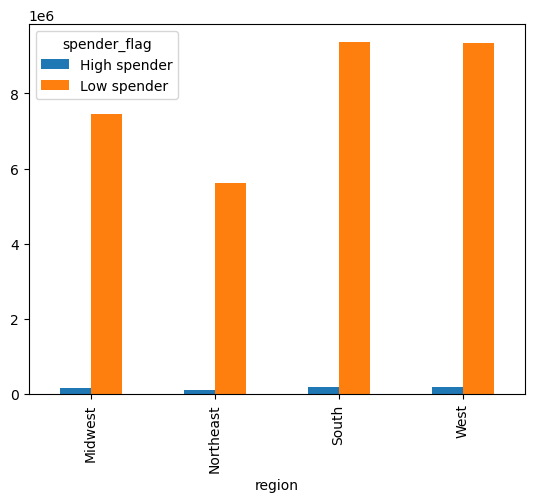

In [11]:
bar_reg_spend = crosstab.plot.bar()

##### no correlation found

In [12]:
bar_reg_spend.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_reg_spend'))

## 4.10.4 User Activity Flag

In [13]:
# activity flag
df.loc[df['max_order'] < 5, 'activity_flag'] = 'Low activity'

C:\Users\darii\AppData\Local\Temp\ipykernel_36728\3784287103.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Low activity' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['max_order'] < 5, 'activity_flag'] = 'Low activity'


In [14]:
df.loc[df['max_order'] >= 5, 'activity_flag'] = 'Normal activity'

In [15]:
# check
df['activity_flag'].value_counts(dropna = False)

activity_flag
Normal activity    30964564
Low activity        1440295
Name: count, dtype: int64

In [16]:
df['activity_flag'] = df['activity_flag'].astype('str')

In [17]:
# df with active customers only
df_active = df[df['activity_flag'] == 'Normal activity']

In [18]:
# check
df_active.shape

(30964564, 34)

In [19]:
df_active.head(5)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,gender,state,age,date_joined,n_dependants,status,income,_merge,region,activity_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,Normal activity
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,Normal activity
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,Normal activity
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,Normal activity
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,Normal activity


In [20]:
# export data
df_active.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_active.pkl'))

## 4.10.5 Defining Customer Profiles

In [21]:
# import departments dataset
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [22]:
# check
df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [23]:
# creating new 'department' column
department = []
for value in df_active ['department_id']:
    if value == 1:
        department.append('frozen')
    elif value == 2:
        department.append('produce')
    elif value == 3:
        department.append('bakery')
    elif value == 4:
        department.append('produce')
    elif value == 5:
        department.append('alcohol')
    elif value == 6:
        department.append('international')
    elif value == 7:
        department.append('beverages')
    elif value == 8:
        department.append('pets')
    elif value == 9:
        department.append('dry goods pasta')
    elif value == 10:
        department.append('bulk')
    elif value == 11:
        department.append('personal care')
    elif value == 12:
        department.append('meat seafood')
    elif value == 13:
        department.append('pantry')
    elif value == 14:
        department.append('breakfast')
    elif value == 15:
        department.append('canned goods')
    elif value == 16:
        department.append('dairy eggs')
    elif value == 17:
        department.append('household')
    elif value == 18:
        department.append('babies')
    elif value == 19:
        department.append('snacks')
    elif value == 20:
        department.append('deli')
    else:
        department.append('missing')

##### no merge was used due to memory issues in the previous task :)

In [24]:
df_active['department'] = department

C:\Users\darii\AppData\Local\Temp\ipykernel_36728\1268414873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active['department'] = department


In [25]:
df_active.head(5)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,state,age,date_joined,n_dependants,status,income,_merge,region,activity_flag,department
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,Normal activity,snacks
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,Normal activity,snacks
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,Normal activity,meat seafood
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,Normal activity,meat seafood
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,Normal activity,bulk


In [26]:
df_active['department'].value_counts(dropna=False)

department
produce            9113684
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
bulk                 33451
Name: count, dtype: int64

## Customer Profiling

### Age profile

In [27]:
df_active['age'].value_counts(dropna=False)

age
79    508337
49    507879
48    506730
31    506218
64    504832
       ...  
60    461897
36    460649
66    454604
41    451269
25    449324
Name: count, Length: 64, dtype: int64

In [28]:
df_active['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

##### groups 18-44, 45-64, 65+ (https://en.wikipedia.org/wiki/Demographics_of_the_United_States)

In [29]:
# create age group column
# 18-44
df_active.loc[(df_active['age'] >=18) & (df_active['age'] <45), 'age_group'] = '18-44'

C:\Users\darii\AppData\Local\Temp\ipykernel_36728\1206124459.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active.loc[(df_active['age'] >=18) & (df_active['age'] <45), 'age_group'] = '18-44'
C:\Users\darii\AppData\Local\Temp\ipykernel_36728\1206124459.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '18-44' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_active.loc[(df_active['age'] >=18) & (df_active['age'] <45), 'age_group'] = '18-44'


In [30]:
# 45-64
df_active.loc[(df_active['age'] >=45) & (df_active['age'] <65), 'age_group'] = '45-64'

In [31]:
# 65+
df_active.loc[(df_active['age'] >=65), 'age_group'] = '65+'

In [32]:
df_active['age_group'].value_counts(dropna=False)

age_group
18-44    13078969
45-64     9690051
65+       8195544
Name: count, dtype: int64

### Income Profile

In [33]:
df_active['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

##### 25%, 50% and 75% for group creation (but rounded to "nice numbers")

In [34]:
# <67T
df_active.loc[(df_active['income'] < 67000), 'income_group'] = '<67T'

C:\Users\darii\AppData\Local\Temp\ipykernel_36728\2762165788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active.loc[(df_active['income'] < 67000), 'income_group'] = '<67T'
C:\Users\darii\AppData\Local\Temp\ipykernel_36728\2762165788.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<67T' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_active.loc[(df_active['income'] < 67000), 'income_group'] = '<67T'


In [35]:
# 67-97T
df_active.loc[(df_active['income'] >=67000) & (df_active['income'] <97000), 'income_group'] = '67-97T'

In [36]:
# 97-127T
df_active.loc[(df_active['income'] >=97000) & (df_active['income'] <127000), 'income_group'] = '97-127T'

In [37]:
# >127T
df_active.loc[(df_active['income'] >= 127000), 'income_group'] = '>127T'

In [38]:
df_active['income_group'].value_counts(dropna=False)

income_group
>127T      7932603
67-97T     7914066
<67T       7661478
97-127T    7456417
Name: count, dtype: int64

### Goods profile

In [39]:
df_active['department'].value_counts(dropna=False)

department
produce            9113684
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
bulk                 33451
Name: count, dtype: int64

#### will be combined with others later

### Number of dependants profile

In [40]:
df_active['n_dependants'].value_counts(dropna=False)

n_dependants
3    7772516
0    7739681
2    7733261
1    7719106
Name: count, dtype: int64

### Combined profile - Family status + Number of dependants

In [41]:
# family status
df_active['status'].value_counts(dropna=False)

status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

In [45]:
# crosstab
cross_status_dependants = pd.crosstab(df_active['status'], df_active['n_dependants'], dropna = False)

In [43]:
# output
cross_status_dependants

n_dependants,0,1,2,3
status,,,,
divorced/widowed,2645271,0,0,0
living with parents and siblings,0,508045,484658,488469
married,0,7211061,7248603,7284047
single,5094410,0,0,0


##### profiles: Living alone, shared living is the best grouping for online shopping case, which is the same as number of dependants grouping

In [51]:
# create living column
df_active.loc[df_active['status'].isin(['divorced/widowed','single']), 'living'] = 'living alone'

C:\Users\darii\AppData\Local\Temp\ipykernel_36728\2460954995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active.loc[df_active['status'].isin(['divorced/widowed','single']), 'living'] = 'living alone'
C:\Users\darii\AppData\Local\Temp\ipykernel_36728\2460954995.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'living alone' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_active.loc[df_active['status'].isin(['divorced/widowed','single']), 'living'] = 'living alone'


In [52]:
df_active.loc[df_active['status'].isin(['married','living with parents and siblings']), 'living'] = 'shared living'

In [53]:
# check
df_active['living'].value_counts(dropna=False)

living
shared living    23224883
living alone      7739681
Name: count, dtype: int64

### Combined profile - Status + Age group

In [46]:
# crosstab
cross_status_age = pd.crosstab(df_active['status'], df_active['age_group'], dropna = False)

In [47]:
# output
cross_status_age

age_group,18-44,45-64,65+
status,,,
divorced/widowed,0,623313,2021958
living with parents and siblings,1481172,0,0
married,8331385,7238740,6173586
single,3266412,1827998,0


##### for now no need to group

### Combined profile - Number of dependants + Age group

In [48]:
# crosstab
cross_dependants_age = pd.crosstab(df_active['n_dependants'], df_active['age_group'], dropna = False)

In [49]:
cross_dependants_age

age_group,18-44,45-64,65+
n_dependants,,,
0,3266412,2451311,2021958
1,3281294,2408823,2028989
2,3264228,2375186,2093847
3,3267035,2454731,2050750


##### for now no need to group

## 4.10.6 Customer Profiles Visualizations

### Age group

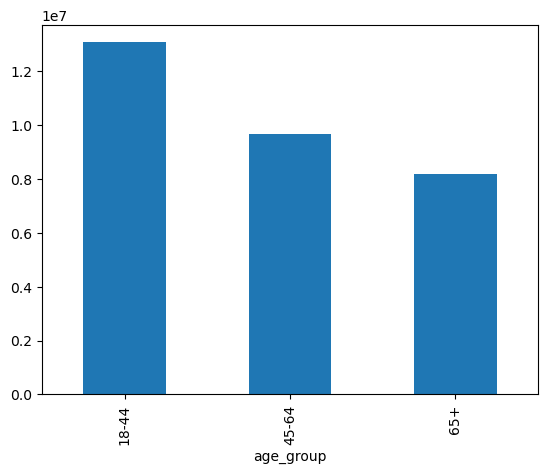

In [57]:
bar_age_group = df_active['age_group'].value_counts().sort_index().plot.bar()

In [59]:
# export
bar_age_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_group.png'))

### Income group

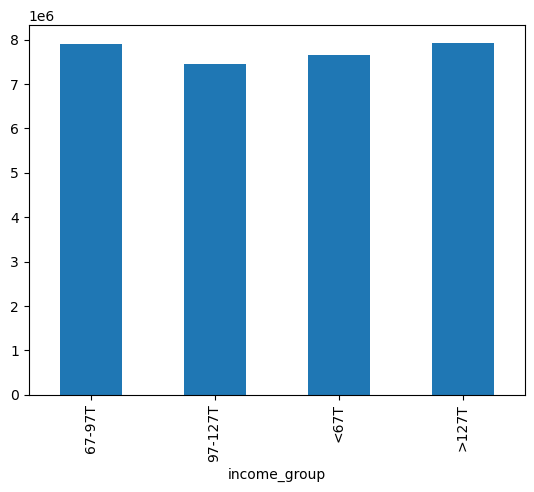

In [60]:
bar_income_group = df_active['income_group'].value_counts().sort_index().plot.bar()

In [61]:
# export
bar_income_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_group.png'))

### Goods

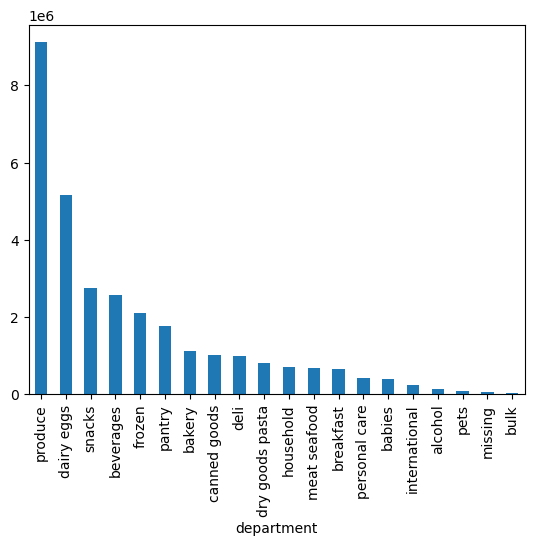

In [63]:
bar_goods = df_active['department'].value_counts().plot.bar()

In [64]:
# export
bar_goods.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_goods.png'))

### Living situation group

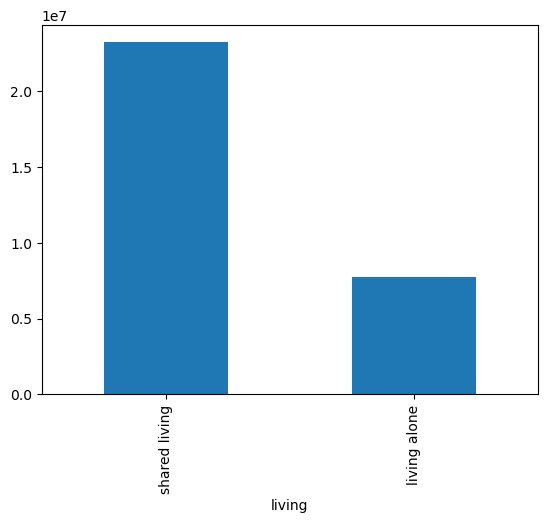

In [65]:
bar_living = df_active['living'].value_counts().plot.bar()

In [66]:
# export
bar_living.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_living.png'))

## 4.10.7 Aggregated values for profiles (usage and expenditure)

### Age group

In [68]:
df_active.groupby('age_group').agg({'order_number': ['mean','max','min'], 'mean_spend': ['mean','max','min']})

order_number         mean_spend                      
                  mean max min       mean           max     min
age_group                                                      
18-44        17.843695  99   1  11.911397  10209.987755  1.0000
45-64        17.862849  99   1  12.112030  15006.940000  1.0000
65+          17.784952  99   1  11.757768  14042.512281  1.2625

##### Along age groups no difference in numbers of order, but visible trend of the middle age group to spend more money, followed by the 65+ customers

### Income group

In [72]:
df_active.groupby('income_group').agg({'order_number': ['mean','max','min'], 'mean_spend': ['mean','max','min']})

order_number         mean_spend                   
                     mean max min       mean           max  min
income_group                                                   
67-97T          18.088586  99   1   8.713289   3453.431034  7.0
97-127T         17.826323  99   1   9.740686   5135.893590  7.0
<67T            17.470500  99   1   7.301387     21.272202  1.0
>127T           17.938853  99   1  21.681245  15006.940000  7.0

##### Again no difference in number of orders. But there is a positive correlation between customers income and spends

### Goods

In [73]:
df_active.groupby('department').agg({'order_number': ['mean','max','min'], 'mean_spend': ['mean','max','min']})

order_number         mean_spend                        
                        mean max min       mean           max       min
department                                                             
alcohol            16.034226  99   1  27.728607  14042.512281  2.046154
babies             19.867090  99   1  10.195950   4357.073913  1.425000
bakery             17.856619  99   1  13.373834  15006.940000  1.900000
beverages          17.901479  99   1  12.683184  15006.940000  1.100000
breakfast          17.469987  99   1  14.683988  10209.987755  2.172727
bulk               20.797555  99   1   8.441167   2496.148259  3.112500
canned goods       16.933858  99   1  12.249512  15006.940000  1.800000
dairy eggs         18.324695  99   1  12.369873  15006.940000  1.568750
deli               17.144802  99   1  11.065003   6983.593023  1.773333
dry goods pasta    16.633019  99   1  12.591432  14042.512281  2.611111
frozen             16.160739  99   1  12.449657  15006.940000  1.845455
household          16.438914  99   1  15.031330  15006.940000  1.000000
international      17.174694  99   1  11.491133   5271.136842  2.400000
meat seafood       16.576910  99   1  13.057558  15006.940000  3.278571
missing            24.281327  99   1  11.812251   6390.138298  3.600000
pantry             17.328319  99   1  12.516061  15006.940000  1.360000
personal care      16.933392  99   1  13.484737  15006.940000  2.222222
pets               15.995927  99   1  15.266906   6390.138298  3.557143
produce            18.494222  99   1  10.368024  14042.512281  1.300000
snacks             17.830354  99   1  11.669675  15006.940000  1.262500

##### Most money is spent on alcohol (even though it's not frequent bought category of goods) which makes it interested to further analyse.

### Living situation group

In [74]:
df_active.groupby('living').agg({'order_number': ['mean','max','min'], 'mean_spend': ['mean','max','min']})

order_number         mean_spend                   
                      mean max min       mean           max  min
living                                                          
living alone     17.957922  99   1  12.102657  15006.940000  1.0
shared living    17.792891  99   1  11.877157  10209.987755  1.0

##### Customers who live alone tend to have slightly higher spends

## 4.10.8-9 Profiles X Regions & Departments

### Age group & region

In [76]:
cross_age_region = pd.crosstab(df_active['region'], df_active['age_group'].sort_values(), dropna = False)

In [77]:
cross_age_region

age_group,18-44,45-64,65+
region,,,
Midwest,3070988,2286479,1904046
Northeast,2282267,1697611,1484807
South,3902513,2826773,2396455
West,3823201,2879188,2410236


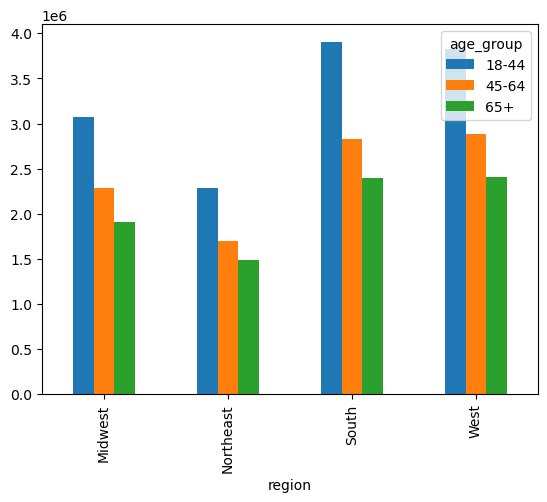

In [82]:
bar_age_region = cross_age_region.plot.bar()

##### In each region the distribution of age groups is the same

In [83]:
# export
bar_age_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_region.png'))

### Age group & goods

In [84]:
cross_age_goods = pd.crosstab(df_active['department'], df_active['age_group'].sort_values(), dropna = False)

In [86]:
cross_age_goods

age_group,18-44,45-64,65+
department,,,
alcohol,61355,46579,36693
babies,174278,129910,106204
bakery,474027,350804,295997
beverages,1073194,814687,684020
breakfast,284280,211274,175296
bulk,14208,10298,8945
canned goods,428791,315774,267509
dairy eggs,2196620,1612490,1368072
deli,424525,314110,265199


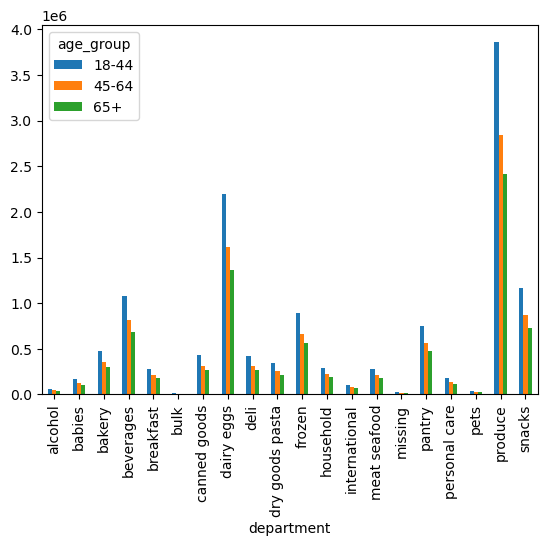

In [85]:
bar_age_goods = cross_age_goods.plot.bar()

##### No visible difference for age groups across departments

In [87]:
# export
bar_age_goods.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_goods.png'))

### Income group & region

In [88]:
cross_income_region = pd.crosstab(df_active['region'], df_active['income_group'].sort_values(), dropna = False)

In [89]:
cross_income_region

income_group,67-97T,97-127T,<67T,>127T
region,,,,
Midwest,1820794,1775630,1770874,1894215
Northeast,1385485,1315501,1354113,1409586
South,2382629,2151133,2277713,2314266
West,2325158,2214153,2258778,2314536


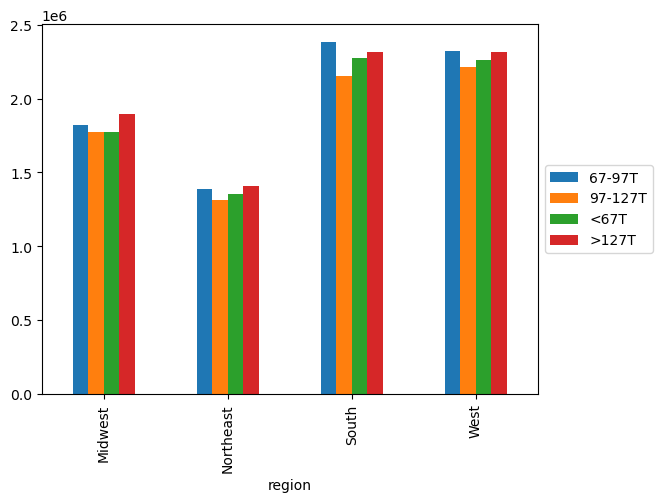

In [129]:
bar_income_region = cross_income_region.plot.bar()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

##### Midwest and Northeast have more customers with high income

In [130]:
# export
bar_income_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_region.png'))

### Icome group & goods

In [121]:
cross_income_goods = pd.crosstab(df_active['department'], df_active['income_group'].sort_values(), dropna = False)

In [122]:
cross_income_goods

income_group,67-97T,97-127T,<67T,>127T
department,,,,
alcohol,33731,32666,36650,41580
babies,113775,105071,82803,108743
bakery,287515,273906,261763,297644
beverages,615955,585163,737043,633740
breakfast,163154,155214,185892,166590
bulk,8682,7740,9320,7709
canned goods,268170,251979,219841,272084
dairy eggs,1350635,1263919,1215904,1346724
deli,257761,243439,245437,257197


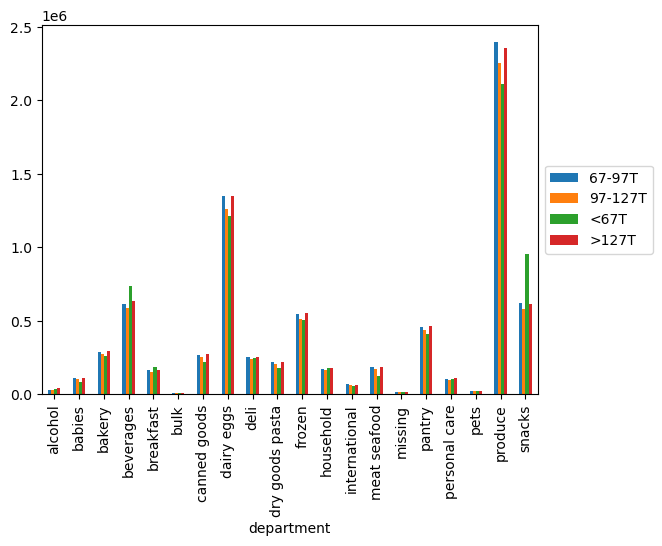

In [123]:
bar_income_goods = cross_income_goods.plot.bar()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

##### Customers with less income buy more then others snacks, beverages and breakfast products. Alcohol (interesting category in this analysis) has most wealthy customers as most frequent buyers. Also bakery, canned goods, dairy and eggs, dry goods, pantry and personal care goods categories are mostly bought by customers with most income.

In [124]:
# export
bar_income_goods.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_goods.png'))

### Goods & region

In [125]:
cross_region_goods = pd.crosstab(df_active['department'], df_active['region'].sort_values(), dropna = False)

In [126]:
cross_region_goods

region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,42845,42722
babies,95741,72712,123555,118384
bakery,261753,199300,327682,332093
beverages,598979,462929,759969,750024
breakfast,156155,117904,196944,199847
bulk,7929,5599,9714,10209
canned goods,237459,176936,298737,298942
dairy eggs,1212490,914616,1527417,1522659
deli,234464,178398,294890,296082


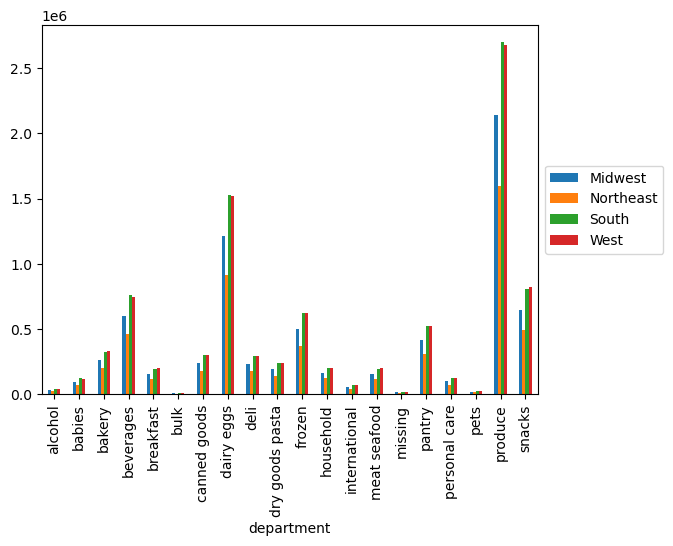

In [127]:
bar_region_goods = cross_region_goods.plot.bar()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

##### Alcohol is mostly sold in South and West regions. In general no clear trends visible

In [128]:
# export
bar_region_goods.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_goods.png'))

### Living situation group & region

In [135]:
cross_living_region = pd.crosstab(df_active['region'], df_active['living'].sort_values(), dropna = False)

In [136]:
cross_living_region

living,living alone,shared living
region,,
Midwest,1822816,5438697
Northeast,1354482,4110203
South,2285817,6839924
West,2276566,6836059


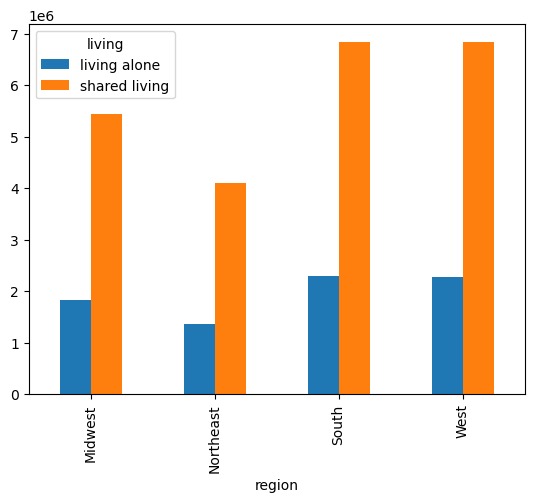

In [137]:
bar_living_region = cross_living_region.plot.bar()

##### Same tendency (most customers share don't live alone) for each region

In [138]:
# export
bar_living_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_living_region.png'))

### Living situation group & goods

In [139]:
cross_living_goods = pd.crosstab(df_active['living'], df_active['department'].sort_values(), dropna = False)

In [140]:
cross_living_goods

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,pantry,personal care,pets,produce,snacks
living,,,,,,,,,,,,,,,,,,,,
living alone,36827,103328,281395,645341,166432,8000,251020,1294376,253382,204296,529348,171358,64461,165878,15935,443904,106205,23602,2284155,690438
shared living,107800,307064,839433,1926560,504418,25451,761054,3882806,750452,617840,1592383,528499,191530,508903,48833,1338801,318101,69458,6829529,2075968


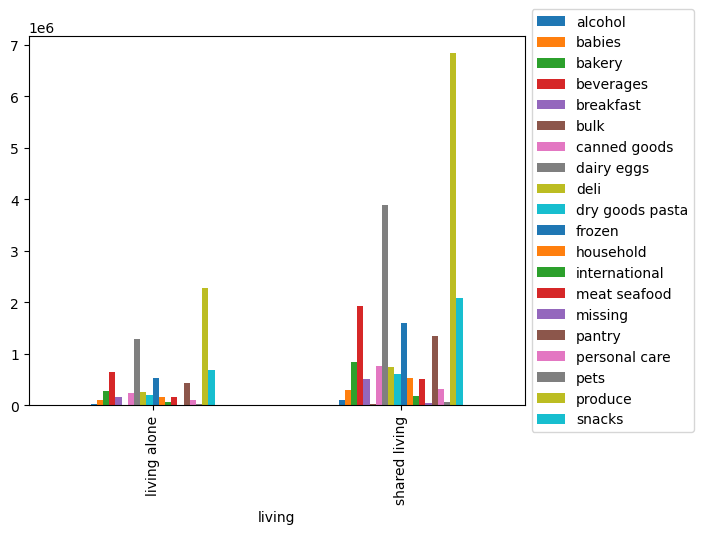

In [141]:
bar_living_goods = cross_living_goods.plot.bar()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

##### no specific tendencies detected

In [142]:
# export
bar_living_goods.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_living_goods.png'))